In [1]:
from config import host
from config import username
from config import password

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
engine = create_engine(f'postgresql://{username}:{password}@{host}:5432/EmployeeSQL')
connection = engine.connect()

In [3]:
df = pd.read_sql_query("\
select * from salaries s \
inner join employees e on e.emp_no = s.emp_no \
inner join titles t on t.emp_no = e.emp_no",connection)

In [4]:
df.describe()

,emp_no,salary,emp_no,emp_no
count,443308.000000,443308.000000,443308.000000,443308.000000
mean,253075.034430,53023.809615,253075.034430,253075.034430
std,161853.292613,14337.904140,161853.292613,161853.292613
min,10001.000000,40000.000000,10001.000000,10001.000000
25%,84855.750000,40000.000000,84855.750000,84855.750000
50%,249847.500000,48746.000000,249847.500000,249847.500000
75%,424891.250000,61843.000000,424891.250000,424891.250000
max,499999.000000,129492.000000,499999.000000,499999.000000


In [5]:
df.head()

,emp_no,salary,from_date,to_date,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,title,from_date,to_date
0,10001,60117.0,1986-06-26,1987-06-26,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828.0,1996-08-03,1997-08-03,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,10002,Staff,1996-08-03,9999-01-01
2,10003,40006.0,1995-12-03,1996-12-02,10003,1959-12-03,Parto,Bamford,M,1986-08-28,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054.0,1986-12-01,1987-12-01,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,10004,Engineer,1986-12-01,1995-12-01
4,10004,40054.0,1986-12-01,1987-12-01,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,10004,Senior Engineer,1995-12-01,9999-01-01


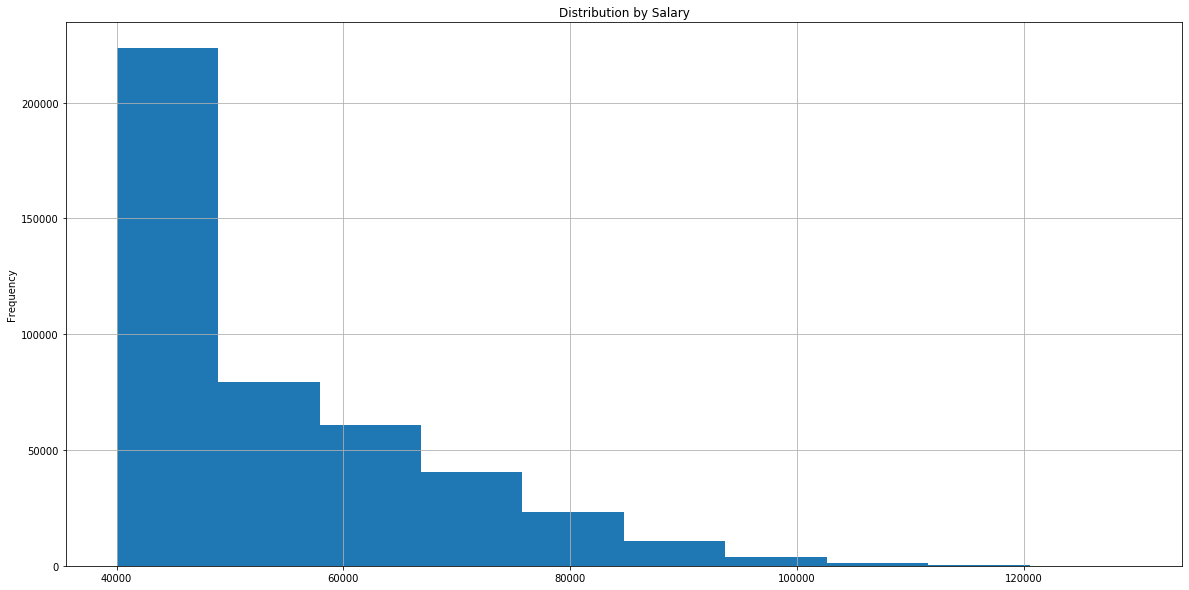

In [25]:
title='Distribution by Salary'

df['salary'].plot.hist(grid=True,title=title, figsize=(20, 10))

# Save the Figure
plt.savefig(f"{title.replace(' ','_')}.png")
plt.show()

In [7]:
df2 = df[['salary','title']].groupby('title').mean().copy()

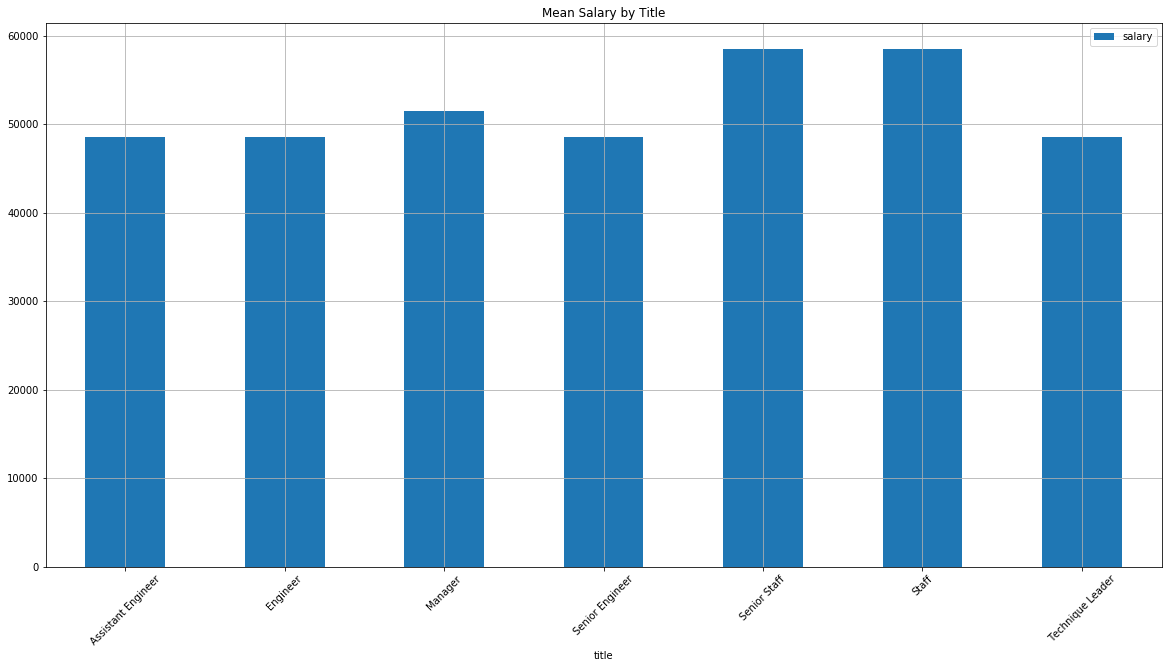

In [24]:
title='Mean Salary by Title'

df2.plot.bar(grid=True,title=title,figsize=(20, 10))

plt.xticks(rotation=45)

# Save the Figure
plt.savefig(f"{title.replace(' ','_')}.png")
plt.show()

In [23]:
df.query('emp_no == 499942')

,emp_no,salary,from_date,to_date,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,title,from_date,to_date
443224,499942,40000.0,1998-03-28,1999-03-28,499942,1963-01-10,April,Foolsday,F,1997-02-10,499942,Technique Leader,1998-03-28,9999-01-01
